In [2]:
# %matplotlib inline
# import mpld3
# mpld3.enable_notebook()

## Data

In [79]:
import pandas as pd
import numpy as np
import math
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns

## Occupancy

In [80]:
with open("Occupancy/datatraining.txt") as file:
    data= file.read()
df= pd.read_csv(StringIO(data),sep=",", 
                header=0, index_col=0,engine="python")
df

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1


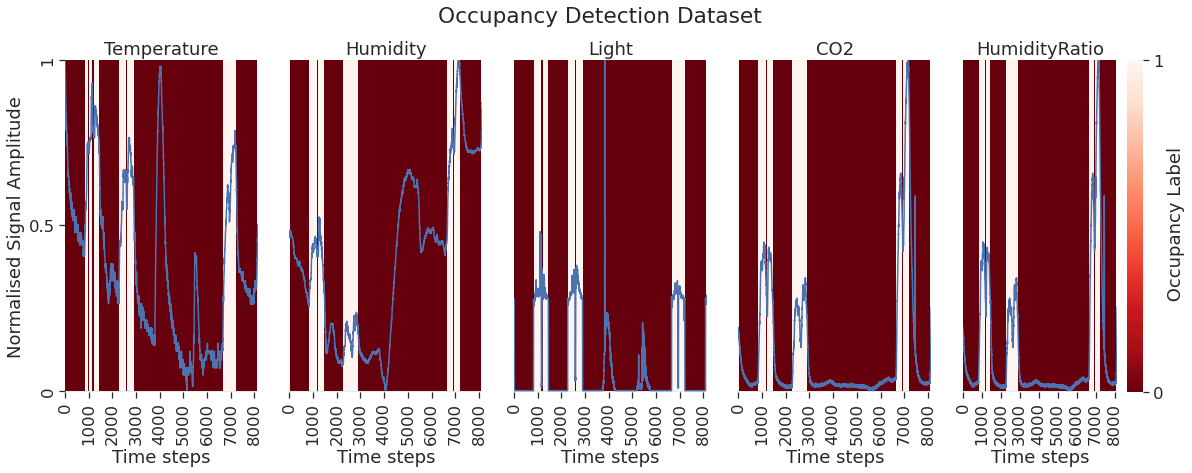

In [127]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler= MinMaxScaler()
fig, ax= plt.subplots(1,5)
fig.set_figwidth(17)
fig.set_figheight(7)

plt.rc("font", size=15)
sns.set(font_scale=1.5)

x=0
i=df.keys()[0]
sns.heatmap(
    df["Occupancy"].to_numpy().reshape(1,-1),
    ax=ax[x], cbar=False, cmap="Reds_r"
)  

ax[x].plot(scaler.fit_transform(df[i].to_numpy().reshape(-1,1)))
ax[x].set_title(i)

ax[x].set_xlabel("Time steps")
ax[x].set_ylabel("Normalised Signal Amplitude")
ax[x].set_ylim(-0.005,1)
ax[x].set_yticks([0,0.5,1])
ax[x].set_yticklabels([0,0.5,1])
ax[x].set_xticks(
    [0]+[i-1 for i in range(0,len(df[i].to_numpy()),1000)][1:]
)
ax[x].set_xticklabels([0]+[i for i in range(0,len(df[i].to_numpy()),1000)][1:])
ax[x].tick_params(left=True, bottom=True)
x += 1
for i in df.keys()[1:-2]:
    sns.heatmap(
        df["Occupancy"].to_numpy().reshape(1,-1),
        ax=ax[x], cbar=False, cmap="Reds_r"
    )  
    
    ax[x].plot(scaler.fit_transform(df[i].to_numpy().reshape(-1,1)))
    ax[x].set_title(i)
    ax[x].set_yticks([])
    ax[x].set_xlabel("Time steps")
    ax[x].set_ylim(-0.005,1)
    ax[x].set_xticks(
        [0]+[i-1 for i in range(0,len(df[i].to_numpy()),1000)][1:]
    )
    ax[x].set_xticklabels([0]+[i for i in range(0,len(df[i].to_numpy()),1000)][1:])
    ax[x].tick_params(left=True, bottom=True)
    x += 1
    
sns.heatmap(
    df["Occupancy"].to_numpy().reshape(1,-1),
    ax=ax[x], cbar=True, cmap="Reds_r", 
    cbar_kws={"label":" Occupancy Label", "ticks":[0,1]}
)  

ax[x].plot(scaler.fit_transform(df[i].to_numpy().reshape(-1,1)))
ax[x].set_title(df.keys()[-2])
ax[x].set_yticks([])
ax[x].set_xlabel("Time steps")
ax[x].set_ylim(-0.005,1)

ax[x].set_xticks(
    [0]+[i-1 for i in range(0,len(df[i].to_numpy()),1000)][1:]
)
ax[x].set_xticklabels([0]+[i for i in range(0,len(df[i].to_numpy()),1000)][1:])
ax[x].tick_params(left=True, bottom=True)
fig.suptitle("Occupancy Detection Dataset",y=0.95)
plt.tight_layout()

### Importance Estimate via Element-wise Multiplication

In [23]:
# Relative Importance Estimate of data channels via Element wise Multiplication of weight profile methods
from sklearn.preprocessing import MinMaxScaler
import pickle
import pandas as pd
ws=[]
original_dict={"DF":"DF", "NFS":"NFS",
               "Weight":"Weight"} #folder: model
model="NFS"
epochs= 60
runs=5

for model in original_dict.keys():
    ws=[]
    for folder in range(runs):
        scaler= MinMaxScaler()
        w= pickle.load( open(f"./experiments/OccupancyDetection/exp_log{folder}/{original_dict[model]}/occupancy-{model}-w-{epochs}.pkl", "rb") )
        w= scaler.fit_transform(w.reshape(-1,1)).reshape(-1)
        ws.append(w)

    if model=="DF":
        df_ws=pd.DataFrame(ws).to_numpy()
    elif model=="NFS":
        nfs_ws=pd.DataFrame(ws).to_numpy()
    elif model=="Weight":
        iew_ws=pd.DataFrame(ws).to_numpy()


Text(0.5, 25.5, 'Channels')

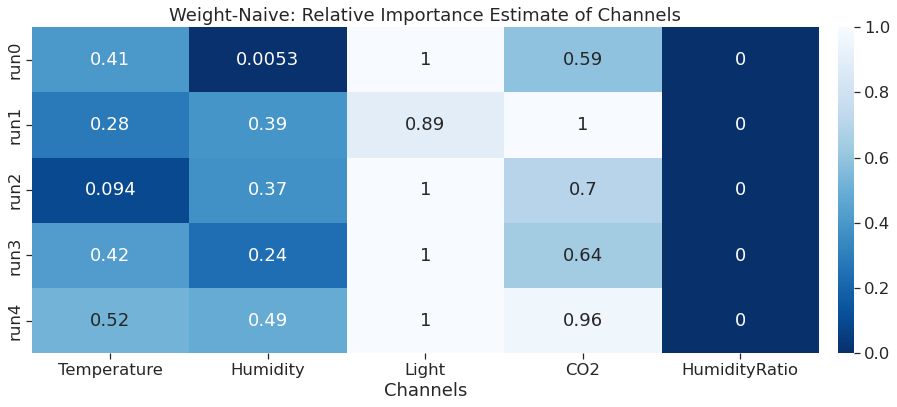

In [168]:
# Relative Importance Estimate of data channels via Element wise Multiplication of a specified weight profile method
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
x_labels=['Temperature',"Humidity","Light","CO2", "HumidityRatio"]
plt.figure(figsize=(17,6))
ax= sns.heatmap(pd.DataFrame(ws), 
            xticklabels=x_labels, 
            yticklabels=[ f"run{i}" for i in range(runs)], 
            annot=True, cbar_kws={"pad":0.02}, cmap="Blues_r")
ax.tick_params(left=True, bottom=True)
if model=="Weight":
    model="Weight-Naive"
plt.title(model+": Relative Importance Estimate of Channels")
plt.xlabel("Channels")

In [25]:
# Relative Importance Estimate of data channels via Element wise Multiplication of 
# the gradient profile method: Grad-AUC

from utilities.subset_func import return_epoch_stat
import pickle
import numpy as np

channels=['Temperature',"Humidity","Light","CO2", "HumidityRatio"]
runs=5
epochs=60
model= "Grad-AUC"
folder_dictionary=[]
for folder in range(runs):
    grads= pickle.load(open(f"./experiments/OccupancyDetection/exp_log{folder}/Grad/list/occupancy-Grad-list-{epochs}.pkl","rb"))
    grad_all= np.array(grads).reshape(epochs,-1,len(channels))
    
    epoch= return_epoch_stat(grad_all, "sum")
    dictionary={}
    
    scaler= MinMaxScaler()
    
    for idx, name in zip(range(len(channels)), channels):
        dictionary[name]= np.trapz(abs(epoch[:, idx]))

    scaler.fit(np.array(list(dictionary.values())).reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
        
    folder_dictionary.append(dictionary)
    
grad_auc_gs=pd.DataFrame(folder_dictionary).to_numpy()

In [26]:
# Relative Importance Estimate of data channels via Element wise Multiplication of 
# the gradient profile method: Grad-ROC

from utilities.subset_func import return_epoch_stat
import pickle
from sklearn.preprocessing import MinMaxScaler

channels=['Temperature',"Humidity","Light","CO2", "HumidityRatio"]
epochs=60
runs=5
model= "Grad-ROC"
folder_dictionary=[]
for folder in range(runs):
    grads= pickle.load(open(f"./experiments/OccupancyDetection/exp_log{folder}/Grad/list/occupancy-Grad-list-{epochs}.pkl","rb"))
    grad_all= np.array(grads).reshape(epochs,-1,len(channels))
    
    scaler= MinMaxScaler()
    
    epoch= return_epoch_stat(grad_all, "sum")
    dictionary={}
    for i in range(len(channels)):
        rolled= np.roll( epoch[:, i], 1 )
        rolled[0]=0.
        diff= epoch[:, i]-rolled
        dictionary[channels[i]]= np.trapz(abs(diff))
        
    scaler.fit(np.array(list(dictionary.values())).reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
        
    folder_dictionary.append(dictionary)
    print(np.percentile(list(dictionary.values()), [30,40,60,80]))
grad_roc_gs=pd.DataFrame(folder_dictionary).to_numpy()

[0.09658042 0.10576787 0.14678524 0.3556241 ]
[0.09081653 0.1694765  0.3877359  0.67770806]
[0.18331595 0.20821171 0.27086946 0.46200998]
[0.0791651  0.09833384 0.36053924 0.78007536]
[0.52094554 0.62286488 0.75281746 0.83589387]


In [27]:
# Relative Importance Estimate of data channels via Element wise Multiplication of 
# the gradient profile method: Grad-STD

from utilities.subset_func import return_epoch_stat
import pickle
from sklearn.preprocessing import MinMaxScaler

channels=['Temperature',"Humidity","Light","CO2", "HumidityRatio"]
epochs=60
runs=5
model= "Grad-STD"
folder_dictionary=[]
for folder in range(runs):
    grads= pickle.load(open(f"./experiments/OccupancyDetection/exp_log{folder}/Grad/list/occupancy-Grad-list-{epochs}.pkl","rb"))
    grad_all= np.array(grads).reshape(epochs,-1,len(channels))
    
    scaler= MinMaxScaler()
    
    epoch= return_epoch_stat(grad_all, "std")
    dictionary={}
    for idx, name in zip(range(len(channels)), channels):
        dictionary[name]= np.trapz(abs(epoch[:, idx]))
        
    scaler.fit(np.array(list(dictionary.values())).reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
        
    folder_dictionary.append(dictionary)
    print(np.percentile(list(dictionary.values()), [30,40,60,80]))
grad_std_gs=pd.DataFrame(folder_dictionary).to_numpy()

[0.12811113 0.16403269 0.21863716 0.39732921]
[0.03905025 0.0551335  0.18059441 0.47572871]
[0.16805215 0.16956336 0.25880971 0.51232995]
[0.03885419 0.05147764 0.21637307 0.55582482]
[0.13963488 0.2731957  0.62584899 0.96359018]


Text(0.5, 25.5, 'Channels')

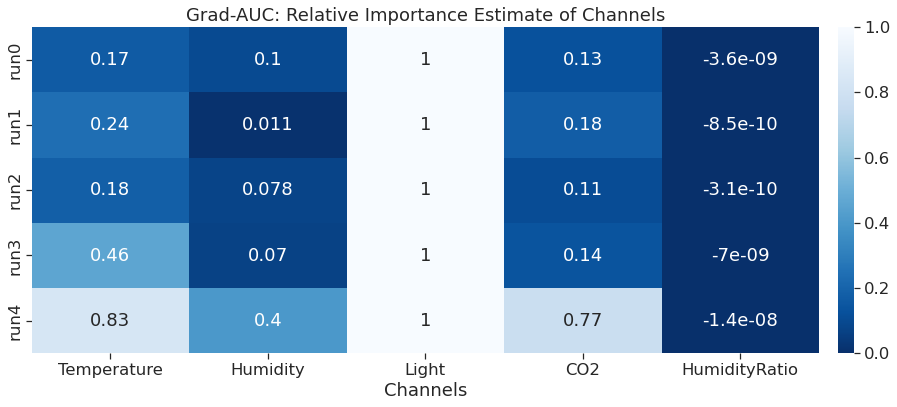

In [160]:
# Relative Importance Estimate of data channels via Element wise Multiplication of 
# a specific gradient profile method
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(17,6))
ax= sns.heatmap(pd.DataFrame(folder_dictionary), 
            xticklabels=channels, 
            yticklabels=[f"run{i}" for i in range(runs)], 
            annot=True, cbar_kws={"pad":0.02}, cmap="Blues_r")
ax.tick_params(left=True, bottom=True)
plt.title(f"{model}: Relative Importance Estimate of Channels")
plt.xlabel("Channels")

### Importance Estimate via Aggregated Hardmard Product

In [24]:
# Relative Importance Estimate of data channels via Aggregated Hardmard Product of weight profile methodss
from sklearn.preprocessing import MinMaxScaler
import pickle
ws=[]
original_dict={"DF":"DF", "NFS":"NFS",
               "Weight":"Weight"} #folder: model
model="DF"
epochs= 60
runs=5
for model in original_dict.keys():
    ws=[]
    for folder in range(runs):
        scaler= MinMaxScaler()
        w= pickle.load( open(f"./experiments/OccupancyDetection/exp_log{folder}/{original_dict[model]}/occupancy-multivar-{model}-w-{epochs}.pkl", "rb") )
        w= np.array(w).sum(axis=0)
        w= scaler.fit_transform(w.reshape(-1,1)).reshape(-1)
        ws.append(w)

    if model=="DF":
        df_ahp_ws=pd.DataFrame(ws).to_numpy()
    elif model=="NFS":
        nfs_ahp_ws=pd.DataFrame(ws).to_numpy()
    elif model=="Weight":
        iew_ahp_ws=pd.DataFrame(ws).to_numpy()


Text(0.5, 25.5, 'Channels')

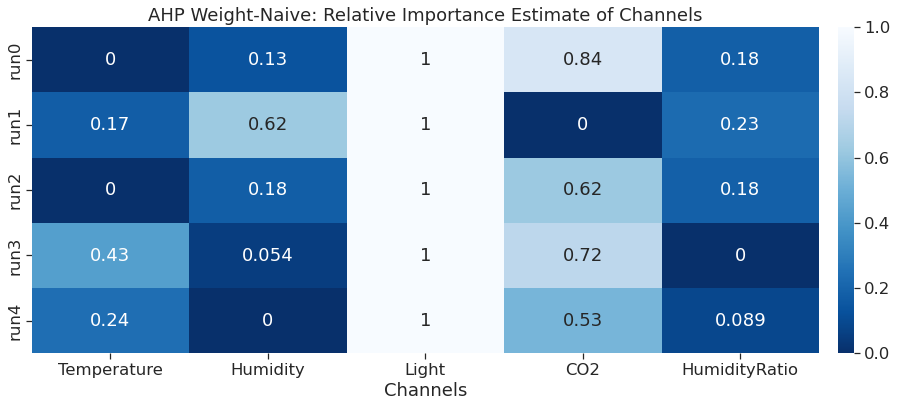

In [170]:
# Relative Importance Estimate of data channels via Aggregated Hardmard Product of specified weight profile methods
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
x_labels=['Temperature',"Humidity","Light","CO2", "HumidityRatio"]
plt.figure(figsize=(17,6))
ax= sns.heatmap(pd.DataFrame(ws), 
            xticklabels=x_labels, 
            yticklabels=[ f"run{i}" for i in range(runs)], 
            annot=True, cbar_kws={"pad":0.02}, cmap="Blues_r")
ax.tick_params(left=True, bottom=True)
if model=="Weight":
    model="Weight-Naive"
plt.title(f"AHP {model}: Relative Importance Estimate of Channels")
plt.xlabel("Channels")

In [28]:
# Relative Importance Estimate of data channels via Aggregated Hardmard Product of 
# the gradient profile method: Grad-AUC
from utilities.subset_func import return_epoch_stat
import pickle
import numpy as np
from sklearn.preprocessing import MinMaxScaler

channels=['Temperature',"Humidity","Light","CO2", "HumidityRatio"]
ts=64
runs=5
epochs=60
model= "Grad-AUC"
folder_dictionary=[]
for folder in range(runs):
    grads= pickle.load(open(f"./experiments/OccupancyDetection/exp_log{folder}/Grad/list/occupancy-multivar-Grad-list-{epochs}.pkl","rb"))
    
    grad_all= np.array(grads).reshape(epochs,-1,ts, len(channels))

    
    scaler= MinMaxScaler()

    epoch= return_epoch_stat(grad_all, "sum")
    dictionary={}
    for idx, name in zip(range(len(channels)), channels):
        dictionary[name]= np.trapz(abs(epoch[:, :, idx]), axis=0).sum()
        scaler.partial_fit(dictionary[name].reshape(-1,1))


    for key in dictionary.keys():
        dictionary[key]= scaler.transform(dictionary[key].reshape(-1,1)).reshape(-1)[0]

    

    folder_dictionary.append(dictionary)
grad_auc_ahp_gs=pd.DataFrame(folder_dictionary).to_numpy()

In [29]:
# Relative Importance Estimate of data channels via Aggregated Hardmard Product of 
# the gradient profile method: Grad-ROC
from utilities.subset_func import return_epoch_stat
import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler

channels=['Temperature',"Humidity","Light","CO2", "HumidityRatio"]
ts=64
runs=5
epochs=60
model= "Grad-ROC"
folder_dictionary=[]
for folder in range(runs):
    grads= pickle.load(open(f"./experiments/OccupancyDetection/exp_log{folder}/Grad/list/occupancy-multivar-Grad-list-{epochs}.pkl","rb"))
    
    grad_all= np.array(grads).reshape(epochs,-1,ts, len(channels))

    
    scaler= MinMaxScaler()

    epoch= return_epoch_stat(grad_all, "sum")
    dictionary={}
    for idx, name in zip(range(len(channels)), channels):
        rolled= np.roll( epoch[:,:, idx], 1 )
        rolled[0]=0.
        diff= epoch[:,:, idx]-rolled
        dictionary[channels[idx]]= np.trapz(abs(diff), axis=0).sum()
        scaler.partial_fit(dictionary[name].reshape(-1,1)) 


    for key in dictionary.keys():
        dictionary[key]= scaler.transform(dictionary[key].reshape(-1,1)).reshape(-1)[0]


    folder_dictionary.append(dictionary)

grad_roc_ahp_gs=pd.DataFrame(folder_dictionary).to_numpy()

In [30]:
# Relative Importance Estimate of data channels via Aggregated Hardmard Product of 
# the gradient profile method: Grad-STD
from utilities.subset_func import return_epoch_stat
import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler

channels=['Temperature',"Humidity","Light","CO2", "HumidityRatio"]
ts=64
runs=5
epochs=60
model= "Grad-STD"
folder_dictionary=[]
for folder in range(runs):
    grads= pickle.load(open(f"./experiments/OccupancyDetection/exp_log{folder}/Grad/list/occupancy-multivar-Grad-list-{epochs}.pkl","rb"))
    
    grad_all= np.array(grads).reshape(epochs,-1,ts, len(channels))

    
    scaler= MinMaxScaler()

    epoch= return_epoch_stat(grad_all, "std")
    dictionary={}
    for idx, name in zip(range(len(channels)), channels):
        dictionary[name]= np.trapz(abs(epoch[:, :, idx]), axis=0).sum()
        scaler.partial_fit(dictionary[name].reshape(-1,1))


    for key in dictionary.keys():
        dictionary[key]= scaler.transform(dictionary[key].reshape(-1,1)).reshape(-1)[0]

    folder_dictionary.append(dictionary)
grad_std_ahp_gs=pd.DataFrame(folder_dictionary).to_numpy()

Text(0.5, 25.5, 'Channels')

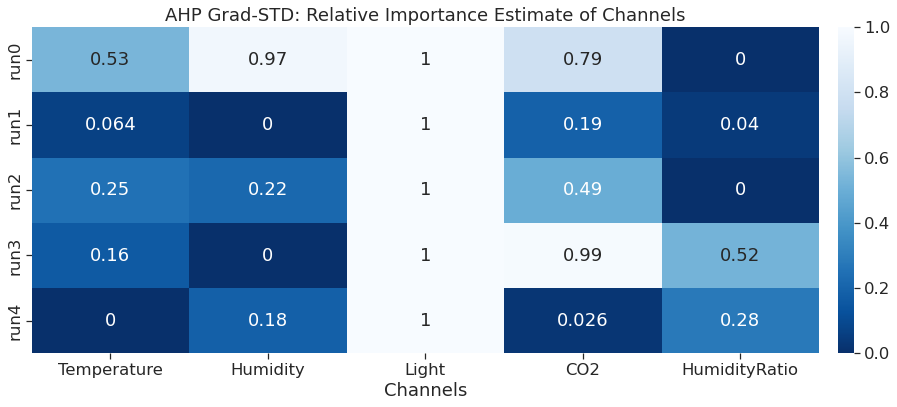

In [166]:
# Relative Importance Estimate of data channels via Aggregated Hardmard Product of 
# a specified gradient profile method
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(17,6))
ax= sns.heatmap(pd.DataFrame(folder_dictionary), 
            xticklabels=channels, 
            yticklabels=[f"run{i}" for i in range(runs)], 
            annot=True, cbar_kws={"pad":0.02}, cmap="Blues_r")
ax.tick_params(left=True, bottom=True)
plt.title(f"AHP {model}: Relative Importance Estimate of Channels")
plt.xlabel("Channels")

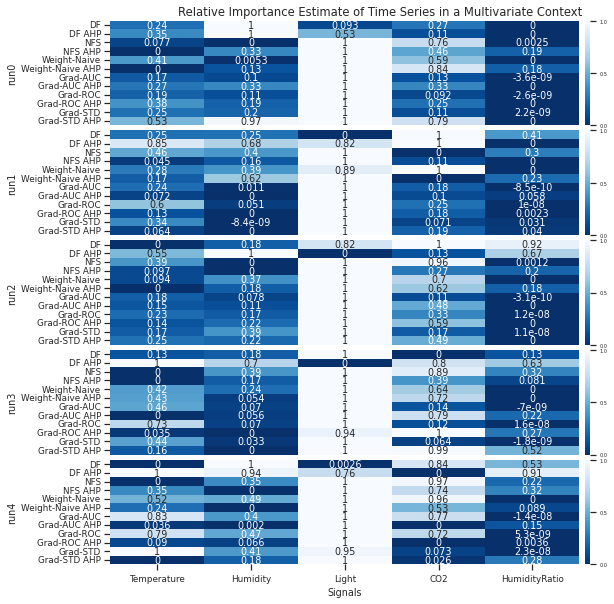

In [33]:
# Relative Importance Estimate of Time Series in a Multivariate Context 
# (using Element wise Multiplication and Aggregated Hardmard Product)
plot_ws=[
    df_ws[0],
    df_ahp_ws[0],
    nfs_ws[0],
    nfs_ahp_ws[0],
    iew_ws[0],
    iew_ahp_ws[0],
    grad_auc_gs[0],
    grad_auc_ahp_gs[0],
    grad_roc_gs[0],
    grad_roc_ahp_gs[0],
    grad_std_gs[0],
    grad_std_ahp_gs[0],
    df_ws[1],
    df_ahp_ws[1],
    nfs_ws[1],
    nfs_ahp_ws[1],
    iew_ws[1],
    iew_ahp_ws[1],
    grad_auc_gs[1],
    grad_auc_ahp_gs[1],
    grad_roc_gs[1],
    grad_roc_ahp_gs[1],
    grad_std_gs[1],
    grad_std_ahp_gs[1],
    df_ws[2],
    df_ahp_ws[2],
    nfs_ws[2],
    nfs_ahp_ws[2],
    iew_ws[2],
    iew_ahp_ws[2],
    grad_auc_gs[2],
    grad_auc_ahp_gs[2],
    grad_roc_gs[2],
    grad_roc_ahp_gs[2],
    grad_std_gs[2],
    grad_std_ahp_gs[2],
    df_ws[3],
    df_ahp_ws[3],
    nfs_ws[3],
    nfs_ahp_ws[3],
    iew_ws[3],
    iew_ahp_ws[3],
    grad_auc_gs[3],
    grad_auc_ahp_gs[3],
    grad_roc_gs[3],
    grad_roc_ahp_gs[3],
    grad_std_gs[3],
    grad_std_ahp_gs[3],
    df_ws[4],
    df_ahp_ws[4],
    nfs_ws[4],
    nfs_ahp_ws[4],
    iew_ws[4],
    iew_ahp_ws[4],
    grad_auc_gs[4],
    grad_auc_ahp_gs[4],
    grad_roc_gs[4],
    grad_roc_ahp_gs[4],
    grad_std_gs[4],
    grad_std_ahp_gs[4],
]

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
x_labels=  channels
y_labels= ["DF", "DF AHP",
           "NFS", "NFS AHP",
           "Weight-Naive", "Weight-Naive AHP",
           "Grad-AUC", "Grad-AUC AHP", 
           "Grad-ROC", "Grad-ROC AHP",
           "Grad-STD", "Grad-STD AHP"
          ]
sns.set(font_scale=0.8)
aspect=15

fig, ax = plt.subplots(5,1)
fig.set_figheight(10)
fig.set_figwidth(10)

start=0
end=start+6*2
for i in range(4):

    sns.heatmap(
        pd.DataFrame(plot_ws[start:end]),
        yticklabels=y_labels,
        annot=True, cmap="Blues_r", ax=ax[i],cbar=True,
        cbar_kws={"pad":0.01,"ticks":[0,0.5,1.0]}
    )

    ax[i].set_xticks([])

    ax[i].set_ylabel(f"run{i}")
    ax[i].tick_params(left=True) 
    ax[i].collections[0].colorbar.ax.tick_params(labelsize=5)
    ax[i].tick_params(axis='y', labelrotation=0)

    start += 6*2
    end += 6*2

sns.heatmap(
    pd.DataFrame(plot_ws[start:]),
    xticklabels=x_labels, 
    yticklabels=y_labels, 
    annot=True, cmap="Blues_r",ax=ax[-1],cbar=True, 
    cbar_kws={"pad":0.01, "ticks":[0,0.5,1.0]}
)

ax[-1].set_ylabel("run4")
ax[-1].tick_params(left=True, bottom=True)
ax[-1].collections[0].colorbar.ax.tick_params(labelsize=5)
ax[-1].tick_params(axis='y', labelrotation=0)

ax[-1].set_xlabel("Signals")
if model=="Weight":
    model="Weight-Naive"
fig.suptitle(
    "Relative Importance Estimate of Time Series in a Multivariate Context",
    y=0.9
)

fig.subplots_adjust(wspace=0, hspace=0.05)
# plt.tight_layout()

### Paired T-Tests

0.9933 & 0.9748 & 0.9841
0.9928 & 0.9723 & 0.9825
0.9922 & 0.973 & 0.9826
0.994 & 0.9771 & 0.9856
0.9917 & 0.9719 & 0.9818
0.9833


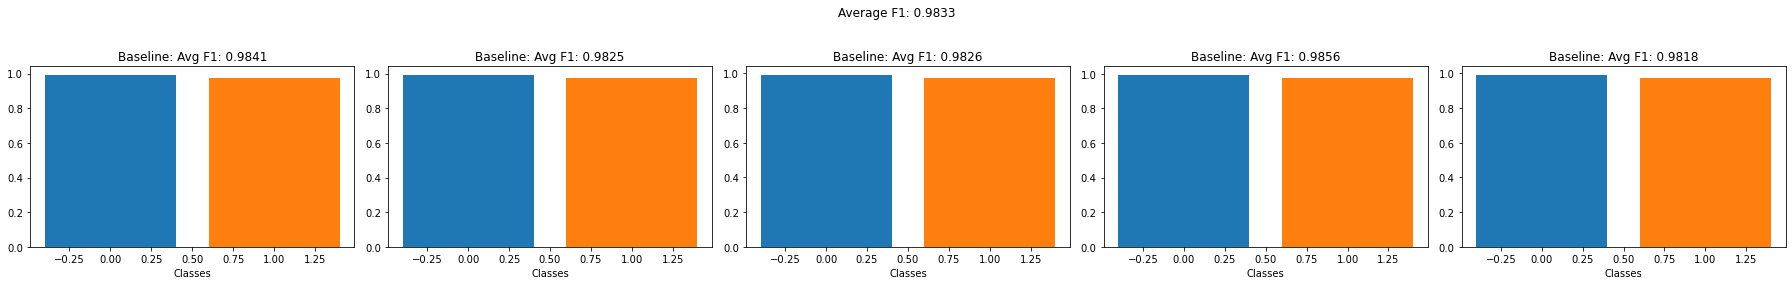

In [66]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

# baseline

fig, axes= plt.subplots(1,5)
i=0; j=0
i=0; j=0
folder_dict={"Baseline":"Baseline"}
channels=['Temperature',"Humidity","Light","CO2", "HumidityRatio"]
model="Baseline"
epochs=60
runs=5
fig.set_figwidth(25)

data_dir="./experiments/OccupancyDetection/"
avg_acc=[]
baseline_f1=[]

i=1; j=0
for folder in range(runs):
    dictionary= pickle.load( open(f"{data_dir}exp_log{folder}/{folder_dict[model]}/dictionary/occupancy-{model}-v_dict-{epochs}.pkl", "rb") )
    axes[j].bar(0, dictionary['0']['f1-score'])
    axes[j].bar(1, dictionary['1']['f1-score'])
    axes[j].set_title(f"{model}: Avg F1: {round(dictionary['macro avg']['f1-score'],4)}")
    axes[j].set_xlabel("Classes")

    j += 1
    
    avg_acc.append(dictionary["macro avg"]["f1-score"])
    baseline_f1.append(dictionary["macro avg"]["f1-score"])
    print(f"{round(dictionary['0']['f1-score'],4)} & {round(dictionary['1']['f1-score'],4)} & {round(dictionary['macro avg']['f1-score'],4)}")
plt.suptitle(f"Average F1: {round(np.mean(avg_acc), 4)}\n" )
print(round(np.mean(avg_acc), 4))
plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

0.9933 & 0.9749 & 0.9841
0.9936 & 0.9754 & 0.9845
0.992 & 0.9724 & 0.9822
0.9941 & 0.9774 & 0.9858
0.9921 & 0.9731 & 0.9826
0.9838


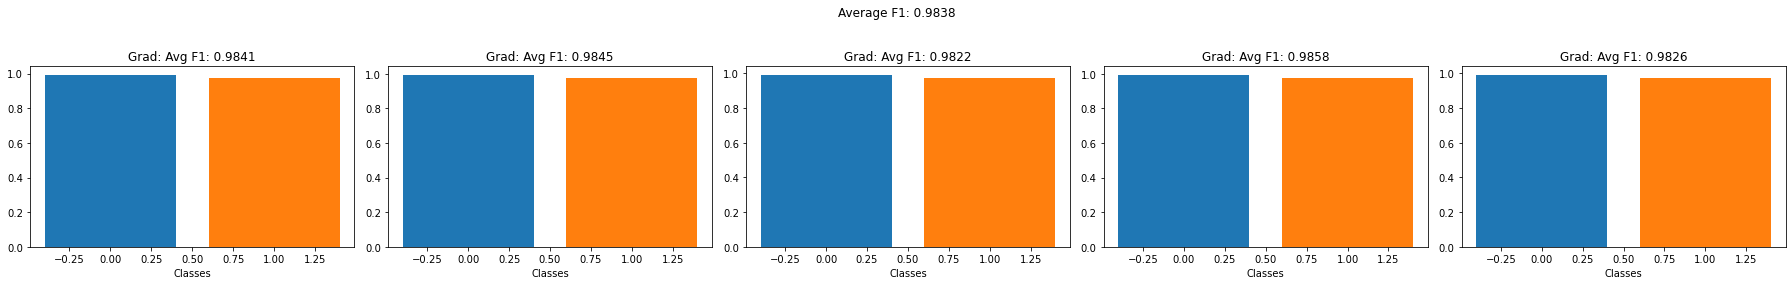

In [67]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

# Element wise Multiplication model performance by specific method (model variable)

fig, axes= plt.subplots(1,5)
i=0; j=0
i=0; j=0
folder_dict={"DF":"DF", "NFS":"NFS","Weight":"Weight", "Grad":"Grad"}
channels=['Temperature',"Humidity","Light","CO2", "HumidityRatio"]
model="Grad"
epochs=60
runs=5
fig.set_figwidth(25)

data_dir="./experiments/OccupancyDetection/"
avg_acc=[]
method_f1=[]

i=1; j=0
for folder in range(runs):
    dictionary= pickle.load( open(f"{data_dir}exp_log{folder}/{folder_dict[model]}/dictionary/occupancy-{model}-v_dict-{epochs}.pkl", "rb") )
    axes[j].bar(0, dictionary['0']['f1-score'])
    axes[j].bar(1, dictionary['1']['f1-score'])
    axes[j].set_title(f"{model}: Avg F1: {round(dictionary['macro avg']['f1-score'],4)}")
    axes[j].set_xlabel("Classes")

    j += 1
    
    avg_acc.append(dictionary["macro avg"]["f1-score"])
    method_f1.append(dictionary["macro avg"]["f1-score"])
    print(f"{round(dictionary['0']['f1-score'],4)} & {round(dictionary['1']['f1-score'],4)} & {round(dictionary['macro avg']['f1-score'],4)}")
plt.suptitle(f"Average F1: {round(np.mean(avg_acc), 4)}\n" )
print(round(np.mean(avg_acc), 4))
plt.tight_layout()

0.9927 & 0.9727 & 0.9827
0.9932 & 0.9737 & 0.9835
0.9914 & 0.9705 & 0.9809
0.9932 & 0.9742 & 0.9837
0.9915 & 0.9713 & 0.9814
0.9824


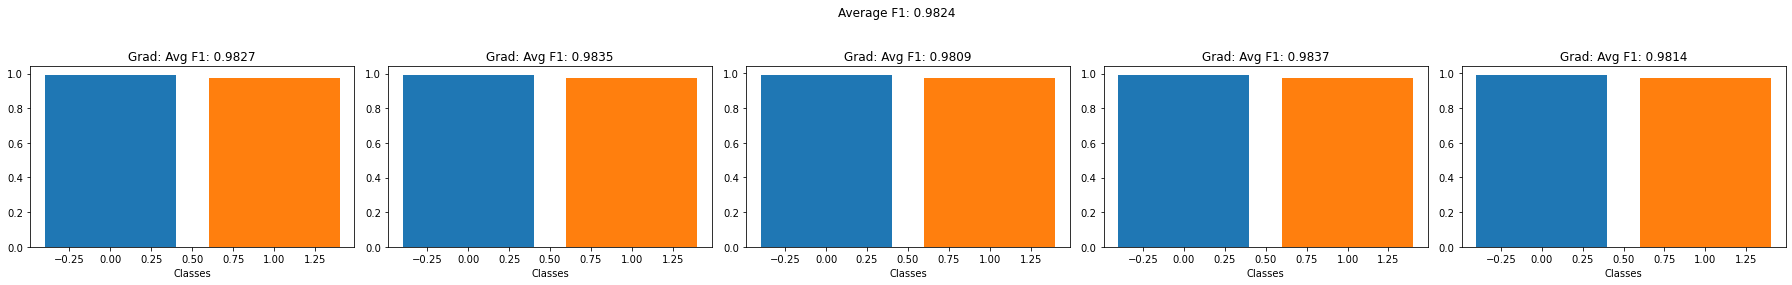

In [70]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

# Hardmard Product model performance by specific method (model variable)

fig, axes= plt.subplots(1,5)
i=0; j=0
i=0; j=0
folder_dict={"Baseline":"Baseline", "DF":"DF", "NFS":"NFS","Weight":"Weight", "Grad":"Grad"}
channels=['Temperature',"Humidity","Light","CO2", "HumidityRatio"]
model="Grad"
epochs=60
runs=5
fig.set_figwidth(25)



data_dir="./experiments/OccupancyDetection/"
avg_acc=[]
method_multivar_f1=[]

i=1; j=0
for folder in range(runs):
    dictionary= pickle.load( open(f"{data_dir}exp_log{folder}/{folder_dict[model]}/dictionary/occupancy-multivar-{model}-v_dict-{epochs}.pkl", "rb") )
    axes[j].bar(0, dictionary['0']['f1-score'])
    axes[j].bar(1, dictionary['1']['f1-score'])
    axes[j].set_title(f"{model}: Avg F1: {round(dictionary['macro avg']['f1-score'],4)}")
    axes[j].set_xlabel("Classes")

    j += 1
    
    avg_acc.append(dictionary["macro avg"]["f1-score"])
    method_multivar_f1.append(dictionary["macro avg"]["f1-score"])
    print(f"{round(dictionary['0']['f1-score'],4)} & {round(dictionary['1']['f1-score'],4)} & {round(dictionary['macro avg']['f1-score'],4)}")
plt.suptitle(f"Average F1: {round(np.mean(avg_acc), 4)}\n" )
print(round(np.mean(avg_acc), 4))
plt.tight_layout()

In [69]:
from scipy.stats import ttest_ind

if 0.5< np.std(method_f1)/ np.std(baseline_f1) < 2:
    res= ttest_ind(method_f1, baseline_f1)
else:
    res= ttest_ind(method_f1, baseline_f1, equal_var=False)


if 0.5< np.std(method_multivar_f1)/ np.std(baseline_f1) < 2:
    multi_res= ttest_ind(method_multivar_f1, baseline_f1)
else:
    multi_res= ttest_ind(method_multivar_f1, baseline_f1, equal_var=False)

print("Element wise Multiplication", res)
print("Hardmard Product", multi_res)

series Ttest_indResult(statistic=0.544025307625273, pvalue=0.6012526927346702)
multivar Ttest_indResult(statistic=-1.0141909585027784, pvalue=0.34017935436801167)


In [ ]:
# Baseline F1: 0.9833

# DF Element wise Multiplication F1: 0.5493
# DF Hardmard Product F1: 0.4411

# NFS Element wise Multiplication F1: 0.9835
# T-Test with baseline: (statistic=0.18942633699823286, pvalue=0.8544764537291186)
# Holm Correction p-value: 1.0
# NFS Hardmard Product F1: 0.9745
# T-Test with baseline: (statistic=-1.8067982230535917, pvalue=0.14243642126777678)
# Holm Correction p-value: 0.85461853

# Weight-Naive Element wise Multiplication F1: 0.9838
# T-Test with baseline: (statistic=0.46741953505670786, pvalue=0.6526674238761067)
# Holm Correction p-value: 1.0
# Weight-Naive Hardmard Product F1: 0.9826
# T-Test with baseline: (statistic=-0.8241922050184199, pvalue=0.43371355461910344)
# Holm Correction p-value: 1.0

# Grad profile Element wise Multiplication F1: 0.9838
# T-Test with baseline: (statistic=0.544025307625273, pvalue=0.6012526927346702)
# Holm Correction p-value: 1.0
# Grad profile Hardmard Product F1: 0.9824 
# T-Test with baseline: (statistic=-1.0141909585027784, pvalue=0.34017935436801167)
# Holm Correction p-value: 1.0

In [6]:
# Holm Correction
from statsmodels.stats.multitest import multipletests
multipletests([0.8544764537291186,0.14243642126777678,0.6526674238761067,0.43371355461910344,0.6012526927346702,0.34017935436801167], alpha=0.05,method="holm")

(array([False, False, False, False, False, False]),
 array([1.        , 0.85461853, 1.        , 1.        , 1.        ,
        1.        ]),
 0.008512444610847103,
 0.008333333333333333)

### LOO and Singleton subsets Retrain

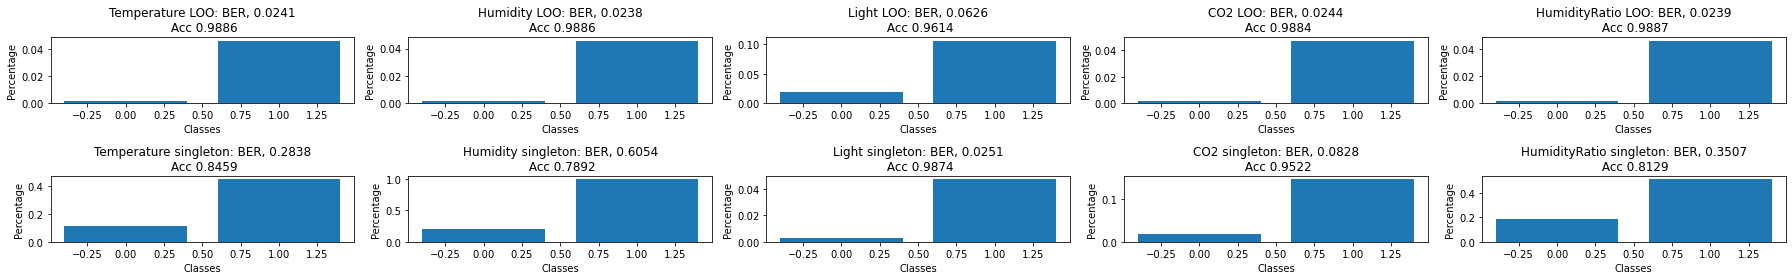

In [17]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

channels=['Temperature',"Humidity","Light","CO2", "HumidityRatio"]
fig, axes= plt.subplots(2,5)
i=0; j=0

epochs=60
runs=5
fig.set_figwidth(25)

i=0; j=0
for select in ["LOO", "singleton"]:
    for channel in channels:

        ber= pickle.load( open(f"./experiments/OccupancyDetection/{channel}/{select}/occupancy-{select}-ber-{epochs}.pkl", "rb") )
        dictionary= pickle.load( open(f"./experiments/OccupancyDetection/{channel}/{select}/dictionary/occupancy-{select}-v_dict-{epochs}.pkl", "rb") )
        axes[i][j].bar([i for i in range(len(ber))], ber)
        axes[i][j].set_title(f"{channel} {select}: BER, {round(np.mean(ber),4)}\n Acc {round(dictionary['accuracy'],4)}")
        axes[i][j].set_xlabel("Classes")
        axes[i][j].set_ylabel("Percentage")
        j += 1
    i += 1; j=0
    
plt.tight_layout()

ber_list=[]
f1_list=[]
i=0; j=0
for select in ["LOO", "singleton"]:
    for channel in channels:

        ber= pickle.load( open(f"./experiments/OccupancyDetection/{channel}/{select}/occupancy-{select}-ber-{epochs}.pkl", "rb") )
        dictionary= pickle.load( open(f"./experiments/OccupancyDetection/{channel}/{select}/dictionary/occupancy-{select}-v_dict-{epochs}.pkl", "rb") )
        ber_list.append(np.mean(ber))
        f1_list.append(dictionary["macro avg"]['f1-score'])
        j += 1
    i += 1; j=0
    
plt.tight_layout()

In [24]:
string=""
for i in f1_list[:5]:
    string += str(round(i,4))
    string += " & "
print(string)

string=""
for i in f1_list[5:]:
    string += str(round(i,4))
    string += " & "
print(string)

0.9831 & 0.9831 & 0.9432 & 0.9829 & 0.9833 & 
0.7131 & 0.4411 & 0.9814 & 0.9305 & 0.5527 & 
